In [62]:
import pandas as pd
import os
import env
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pydataset import data
from acquire import get_telco_data
import warnings
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Acquire the data

In [26]:
df = get_telco_data()

In [27]:
df = df.loc[:,~df.columns.duplicated()]

In [28]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,3,Yes,2,90.45,5957.9,No,Two year,DSL,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,No,3,No,4,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,No,3,No,3,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,No,3,Yes,4,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,Yes,3,Yes,3,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


## Split the data

In [29]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [30]:
train, validate, test = train_validate_test_split(df, target='churn')
train.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
5642,1982-FEBTD,Female,0,Yes,Yes,23,Yes,Yes,3,No internet service,...,No internet service,3,Yes,4,25.6,514.75,No,Two year,None,Credit card (automatic)
3338,8982-NHAVY,Male,0,No,No,27,Yes,Yes,2,No,...,Yes,2,Yes,3,100.5,2673.45,No,One year,Fiber optic,Bank transfer (automatic)


In [31]:
train.shape, validate.shape, test.shape

((3943, 24), (1691, 24), (1409, 24))

In [32]:
X_train, y_train = train.drop(columns='churn'), train.churn
X_validate, y_validate = validate.drop(columns='churn'), validate.churn
X_test, y_test = test.drop(columns='churn'), test.churn

In [33]:
X_train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,contract_type,internet_service_type,payment_type
5642,1982-FEBTD,Female,0,Yes,Yes,23,Yes,Yes,3,No internet service,...,No internet service,No internet service,3,Yes,4,25.60,514.75,Two year,None,Credit card (automatic)
3338,8982-NHAVY,Male,0,No,No,27,Yes,Yes,2,No,...,Yes,Yes,2,Yes,3,100.50,2673.45,One year,Fiber optic,Bank transfer (automatic)
4273,4115-NZRKS,Female,1,No,No,7,Yes,No,2,No,...,Yes,Yes,1,Yes,1,89.15,574.35,Month-to-month,Fiber optic,Electronic check
2382,9633-DENPU,Female,0,Yes,No,47,Yes,No,1,No,...,Yes,No,1,Yes,3,58.60,2723.4,Month-to-month,DSL,Bank transfer (automatic)
2655,5693-PIPCS,Male,0,No,No,41,Yes,No,2,No,...,Yes,Yes,3,Yes,4,99.65,4220.35,Two year,Fiber optic,Credit card (automatic)


In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3943 non-null   object 
 1   gender                    3943 non-null   object 
 2   senior_citizen            3943 non-null   int64  
 3   partner                   3943 non-null   object 
 4   dependents                3943 non-null   object 
 5   tenure                    3943 non-null   int64  
 6   phone_service             3943 non-null   object 
 7   multiple_lines            3943 non-null   object 
 8   internet_service_type_id  3943 non-null   int64  
 9   online_security           3943 non-null   object 
 10  online_backup             3943 non-null   object 
 11  device_protection         3943 non-null   object 
 12  tech_support              3943 non-null   object 
 13  streaming_tv              3943 non-null   object 
 14  strea

## Clean the data

In [35]:
dummy_df = pd.get_dummies(X_train[['partner', 'dependents', 'gender', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']], drop_first=True)
X_train = pd.concat([X_train, dummy_df], axis=1)

In [36]:
X_train = X_train.drop(columns = ['customer_id', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type'])

In [37]:
X_train.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,partner_Yes,dependents_Yes,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5642,0,23,3,3,Yes,4,25.60,514.75,1,1,...,1,0,1,0,1,0,1,0,1,0
3338,0,27,2,2,Yes,3,100.50,2673.45,0,0,...,0,0,0,1,0,0,0,1,0,1
4273,1,7,2,1,Yes,1,89.15,574.35,0,0,...,0,0,0,0,0,0,0,1,0,1
2382,0,47,1,1,Yes,3,58.60,2723.4,1,0,...,0,1,0,0,0,0,0,1,0,0
2655,0,41,2,3,Yes,4,99.65,4220.35,0,0,...,0,1,0,0,0,1,0,1,0,1


In [38]:
X_train = X_train.drop(columns = ['paperless_billing', 'total_charges'])

In [39]:
X_train.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,partner_Yes,dependents_Yes,gender_Male,phone_service_Yes,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5642,0,23,3,3,4,25.60,1,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3338,0,27,2,2,3,100.50,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
4273,1,7,2,1,1,89.15,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2382,0,47,1,1,3,58.60,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2655,0,41,2,3,4,99.65,0,0,1,1,...,0,1,0,0,0,1,0,1,0,1


## Baseline Accuracy

In [40]:
train.churn.value_counts()

No     2897
Yes    1046
Name: churn, dtype: int64

The majority of our customers have not churned, so our baseliene assumption is that cutsomers will not churn.

In [41]:
model = DummyClassifier(strategy= 'constant', constant ='No')

In [42]:
model.fit(X_train, y_train)

DummyClassifier(constant='No', strategy='constant')

In [43]:
accuracy = round(model.score(X_train, y_train), 2)
print(f'Training accuracy: {accuracy}')

Training accuracy: 0.73


## Decision Tree

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import graphviz
from graphviz import Graph
from sklearn import tree
import numpy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [45]:
clf1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [46]:
clf1 = clf1.fit(X_train, y_train)

In [47]:
clf1

DecisionTreeClassifier(max_depth=3, random_state=123)

In [48]:
dot_data = export_graphviz(clf1, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_tree', view=True)

'telco_tree.pdf'

The tree indicates to us that the main predictor of churn is contract type. Customers with contract type ID 1 are more likely to churn than customers with contract type ID 2 and 3.

Of customers who have contract type iD one, the biggest predictor of churn is monthly charges less than 64.43.

3 is a year contract, 2 is yearly, 1 is month to month

### Probability of churn

In [49]:
y_pred = clf1.predict(X_train)

In [50]:
y_pred_proba = clf1.predict_proba(X_train)

In [51]:
y_probability = pd.DataFrame(y_pred_proba)
y_probability.head()

,0,1
0,0.983914,0.016086
1,0.808442,0.191558
2,0.254808,0.745192
3,0.793834,0.206166
4,0.808442,0.191558


### Evaluate in-sample results

#### Accuracy score

In [52]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


#### Confusion Matrix

In [53]:
confusion_matrix(y_train, y_pred)

array([[2791,  106],
       [ 736,  310]])

In [54]:
labels1 = ['no_churn_actual', 'churn_actual']
labels2 = ['no_churn_predicted', 'churn_predicted']

pd.DataFrame(confusion_matrix(y_train, y_pred), index = labels1, columns = labels2)

,no_churn_predicted,churn_predicted
no_churn_actual,2791,106
churn_actual,736,310


### Classification Report

In [55]:
classification_report_churn = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T

In [56]:
classification_report_churn

,precision,recall,f1-score,support
No,0.791324,0.963410,0.868929,2897.000000
Yes,0.745192,0.296367,0.424077,1046.000000
accuracy,0.786457,0.786457,0.786457,0.786457
macro avg,0.768258,0.629889,0.646503,3943.000000
weighted avg,0.779086,0.786457,0.750918,3943.000000


## Random forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

### Fit the model

In [60]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

### Feature importance

In [71]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns = [ "relative importance"])

In [72]:
feature_importances = feature_importances.sort_values(by = ['relative importance'], ascending = False)

In [73]:
feature_importances.columns.names = ['category']

In [74]:
feature_importances

category,relative importance
tenure,0.241970
monthly_charges,0.156533
contract_type_id,0.148934
payment_type_id,0.080547
internet_service_type_id,0.043483
tech_support_Yes,0.040455
online_security_Yes,0.036775
gender_Male,0.023522
online_backup_Yes,0.022281
senior_citizen,0.020345


The above chart indicates to us that the most important values for predicting churn are: **tenure**, **monthly charges**, **contract type**, and **payment type**.

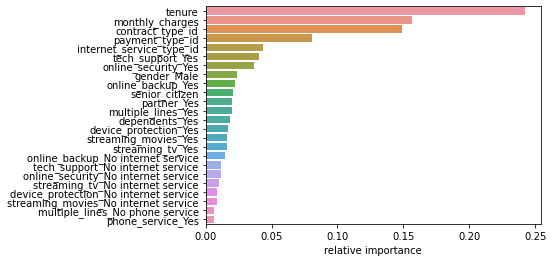

In [85]:
relative_importances = sns.barplot(x=feature_importances['relative importance'], y=feature_importances.index)

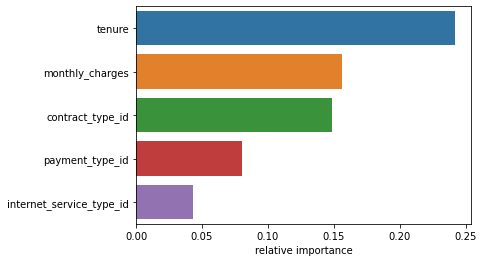

In [86]:
relative_importances = sns.barplot(x=feature_importances['relative importance'][0:5], y=feature_importances.index[0:5])

### Mann Whitney Test

Let's run the Mann Whitney test on these variables to see if they're really correlated with churn.

In [51]:
from scipy.stats import mannwhitneyu
from scipy import stats

In [52]:
train_has_churned = train[train["churn"] == "Yes"]
train_no_churn = train[train["churn"] == "No"]

In [53]:
stats.mannwhitneyu(train_has_churned['tenure'], train_no_churn['tenure'], use_continuity=True)

MannwhitneyuResult(statistic=787745.5, pvalue=5.978994288055496e-118)

In [54]:
stats.mannwhitneyu(train_has_churned['monthly_charges'], train_no_churn['monthly_charges'], use_continuity=True)

MannwhitneyuResult(statistic=1160715.0, pvalue=1.4455529063493655e-29)

In [55]:
stats.mannwhitneyu(train_has_churned['contract_type_id'], train_no_churn['contract_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=789116.0, pvalue=3.760387895572131e-144)

In [56]:
stats.mannwhitneyu(train_has_churned['payment_type_id'], train_no_churn['payment_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=1010432.5, pvalue=4.42203203035722e-62)

In [57]:
stats.mannwhitneyu(train_has_churned['internet_service_type_id'], train_no_churn['internet_service_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=1469861.5, pvalue=0.061278792735769076)

Tenure, monthly charges, contract type id, and payment type are all strongly associated with churn. 

### Make predictions

In [69]:
y_pred = rf.predict(X_train)

In [70]:
pd.DataFrame(y_pred)

,0
0,No
1,No
2,Yes
3,No
4,No
...,...
3938,No
3939,No
3940,No
3941,No


### Estimate probability

In [71]:
y_pred_proba = rf.predict_proba(X_train)

In [72]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.987037,0.012963
1,0.821021,0.178979
2,0.444101,0.555899
3,0.869228,0.130772
4,0.886389,0.113611
...,...,...
3938,0.505858,0.494142
3939,0.981048,0.018952
3940,0.638087,0.361913
3941,0.833498,0.166502


#### Accuracy

In [57]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.89


#### Confusion matrix

In [58]:
labels1 = ['did not churn actual', 'churned actual']
labels2 = ['did not churn predicted', 'churned predicted']
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels1, columns=labels2)

In [59]:
df_confusion_matrix

,did not churn predicted,churned predicted
did not churn actual,2742,155
churned actual,286,760


#### Classification Report

In [60]:
classification_report_2 = classification_report(y_train, y_pred, output_dict = True)

In [61]:
df_classification_report_2 = pd.DataFrame(classification_report_2).T

In [62]:
df_classification_report_2

,precision,recall,f1-score,support
No,0.905548,0.946496,0.925570,2897.000000
Yes,0.830601,0.726577,0.775115,1046.000000
accuracy,0.888156,0.888156,0.888156,0.888156
macro avg,0.868075,0.836537,0.850342,3943.000000
weighted avg,0.885666,0.888156,0.885657,3943.000000
